## Multiple Linear Regression
### Problem statement
Based on various meteorological surveys and people's styles, the service provider of US bike-sharing firm BoomBikes, has gathered a large dataset on daily bike demands across the American market based on some factors. 

Esentially the company wants to know
- Which variables are significant in predicting the demand for shared bikes.

- How well those variables describe the bike demands.


In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing required libraries

from sklearn.model_selection import train_test_split # For Splitting dataset into train and test dataset
from sklearn.preprocessing import MinMaxScaler # For  Rescaling the training dataset
import statsmodels.api as sm # statsmodels for detail statistical summary
from statsmodels.stats.outliers_influence import variance_inflation_factor # for VIF calculation
from sklearn.metrics import r2_score #for R-squared

In [3]:
# Supress warnings
import warnings
warnings.filterwarnings("ignore")

## Step 1: Reading and Understanding the Data

In [4]:
rentalbike=pd.read_csv("day.csv")

In [5]:
rentalbike.shape

(730, 16)

- There are 730 rows and 16 columns in the dataset

In [6]:
rentalbike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [7]:
rentalbike.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
569,570,24-07-2019,3,1,7,0,2,1,1,30.784153,35.32250,65.5000,14.167418,1140,6452,7592
118,119,29-04-2018,2,0,4,0,5,1,1,20.910000,24.87315,45.7083,16.084221,878,3717,4595
80,81,22-03-2018,2,0,3,0,2,1,1,18.108347,22.03210,62.4583,15.125250,460,2243,2703
391,392,27-01-2019,1,1,1,0,5,1,2,17.425000,20.76915,74.1250,22.958689,269,3187,3456
40,41,10-02-2018,1,0,2,0,4,1,1,5.918268,7.47740,43.7391,14.869645,47,1491,1538


In [8]:
rentalbike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


- The number of non-null counts = number of total rows so there are no missing values

In [9]:
rentalbike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


##### We observed that some categorical columns also have numeric values so will repalce all numerical values to string datatype for relevant categories

In [10]:
# Instant is just Sr. no. so dropping the column
rentalbike.drop('instant',axis=1,inplace=True)

## Step 2 : Visualizing the data

- From data dictionary we observed that 
    - atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
    - casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered
    - temp : temperature in Celsius

- are numeric variables    

#### Visualizing Numeric Variables

In [11]:
rentalbike.columns

Index(['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')

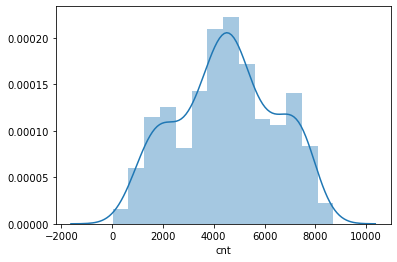

In [12]:
#checking data distribution of cnt
sns.distplot(rentalbike['cnt'])
plt.show()

- cnt values are distributed between approximately (0 to 8500) 
- we can see peek values att approximately 5000 

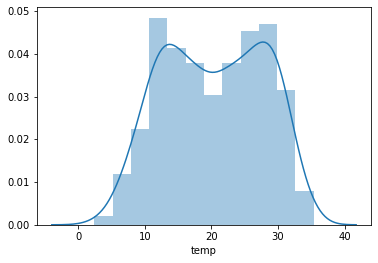

In [13]:
#checking data distribution of temp
sns.distplot(rentalbike['temp'])
plt.show()

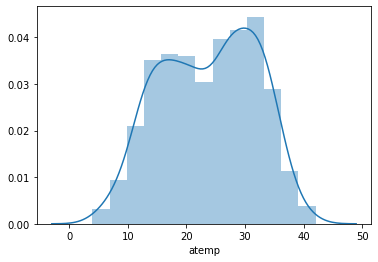

In [14]:
#checking data distribution of atemp
sns.distplot(rentalbike['atemp'])
plt.show()

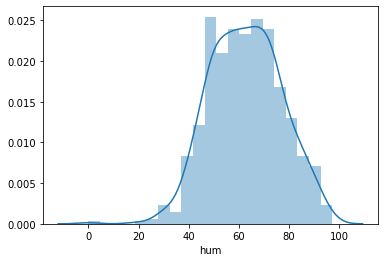

In [15]:
#checking data distribution of hum
sns.distplot(rentalbike['hum'])
plt.show()

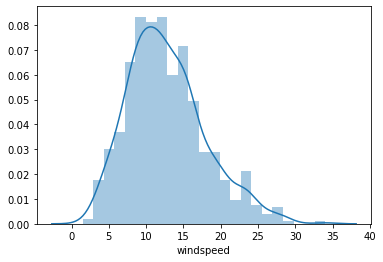

In [16]:
#checking data distribution of windspeed
sns.distplot(rentalbike['windspeed'])
plt.show()

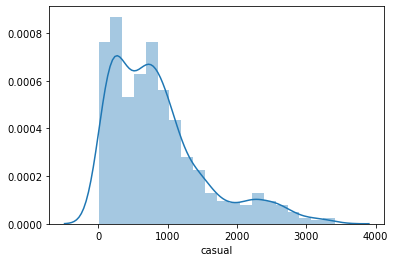

In [17]:
#checking data distribution of casual customers
sns.distplot(rentalbike['casual'])
plt.show()

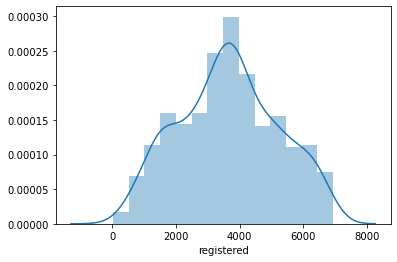

In [18]:
#checking data distribution of registered customers
sns.distplot(rentalbike['registered'])
plt.show()

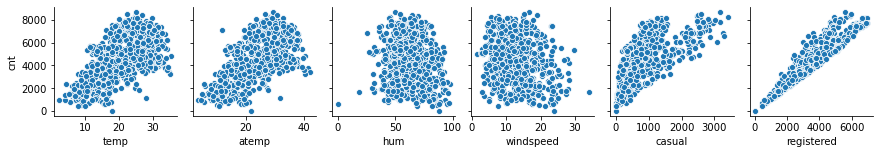

In [19]:
#pairplots for numeric variables with target varible cnt 
sns.pairplot(data=rentalbike,y_vars='cnt',x_vars=['temp', 'atemp', 'hum', 'windspeed', 'casual','registered'],kind='scatter',size=2)
plt.show()

- we can observe following relationships between 'cnt' and :
   - temp      : almost linear
   - atemp     : amlost linear
   - hum       : much scattered data,no realtion
   - windspeed : much scattered data,no realtion
   - casual    : almost linear
   - registered: linear

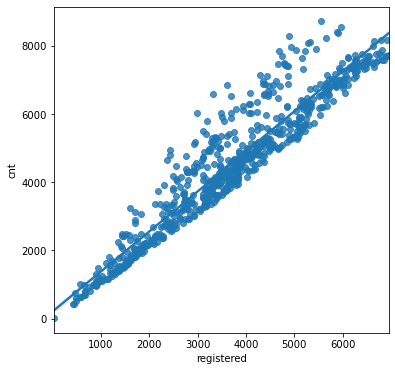

In [20]:
#regression plot for cnt and registered.
plt.figure(figsize=(6,6))
sns.regplot(y='cnt',x='registered',data=rentalbike)
plt.show()

- we can observe that data is hugging the line very closely which is obvious as cnt = registered + casual.

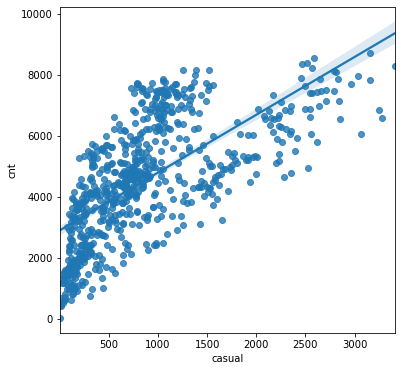

In [21]:
#regression plot for cnt and casual.
plt.figure(figsize=(6,6))
sns.regplot(y='cnt',x='casual',data=rentalbike)
plt.show()

- we can obsereve that as the for lower values and much higher values of cnt casual variable is not very close to the regression line. 
- but cnt = registered + casual.

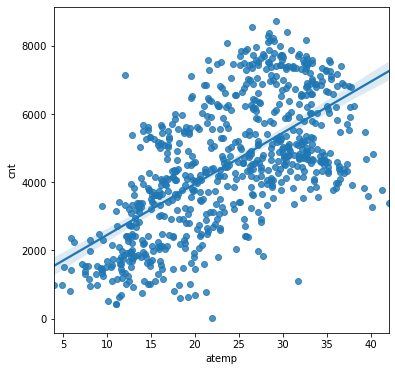

In [22]:
#regression plot for cnt and atemp.
plt.figure(figsize=(6,6))
sns.regplot(y='cnt',x='atemp',data=rentalbike)
plt.show()

- we can onsereve that though almost linear relation can be seen here but data is not hugging the line well.  

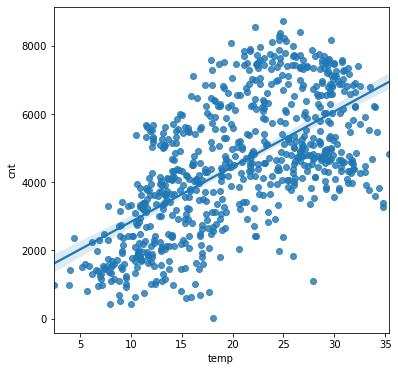

In [23]:
#regression plot for cnt and atemp.
plt.figure(figsize=(6,6))
sns.regplot(y='cnt',x='temp',data=rentalbike)
plt.show()

- we can onsereve that though almost linear relation can be seen here but data is not hugging the line well.  

In [24]:
rentalbike.dtypes

dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

- From data dictionary we observed that instant: record index
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not 
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	- weathersit : weather situation
    
- are categorical data    

#### Visualizing Categorical Variables

- Converting numeric values to categories

In [25]:
# Checking categories for season 
rentalbike.season.value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [26]:
# Assigning category to season : season (1:spring, 2:summer, 3:fall, 4:winter)
def asgn_season(x):
    if x==1:
        return 'spring'
    elif x==2:
        return 'summer'
    elif x==3:
        return 'fall'
    elif x==4:
        return 'winter'
    
rentalbike['season']=rentalbike['season'].apply(lambda x : asgn_season(x))    

In [27]:
rentalbike.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2018,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


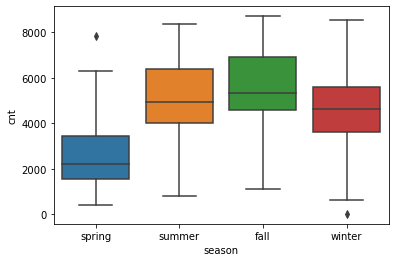

In [28]:
# Checking season Vs cnt
sns.boxplot(x='season',y='cnt',data=rentalbike)
plt.show()

- We can observe that medians of summer, fall and winter are near to each other while spring is very low.
- Rental bike cnt during spring is low compared to summer,fall and winter
- Renatl bike cnt is highest in fall.

In [29]:
# Assigning category to mnth : month ( 1 to 12)
def asgn_mnth(x):
    return x.map({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun',
        7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'})

rentalbike[['mnth']]=rentalbike[['mnth']].apply(asgn_mnth)    

In [30]:
rentalbike.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2018,spring,0,Jan,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,spring,0,Jan,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,spring,0,Jan,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,spring,0,Jan,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,spring,0,Jan,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


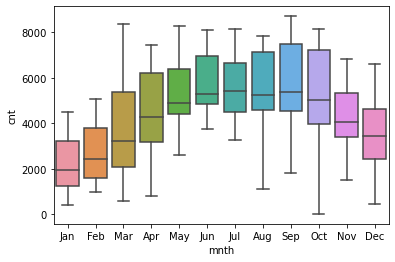

In [31]:
sns.boxplot(x='mnth',y='cnt',data=rentalbike)
plt.show()

- we can observe that from month March to October there is good demand for rental bikes.
- Rental bike cnt is least in months of January and February 

In [32]:
#checking weekday
rentalbike.weekday.value_counts()

6    105
1    105
0    105
5    104
4    104
2    104
3    103
Name: weekday, dtype: int64

In [33]:
# Assigning category to Weekday : day of a week ( 0 to 6)
def asgn_weekday(x):
    return x.map({1:'Mon', 2:'Tues', 3:'Wed', 4:'Thurs', 5:'Fri', 6:'Sat',
        0:'Sun'})

rentalbike[['weekday']]=rentalbike[['weekday']].apply(asgn_weekday)    

In [34]:
rentalbike.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2018,spring,0,Jan,0,Sat,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,spring,0,Jan,0,Sun,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,spring,0,Jan,0,Mon,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,spring,0,Jan,0,Tues,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,spring,0,Jan,0,Wed,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


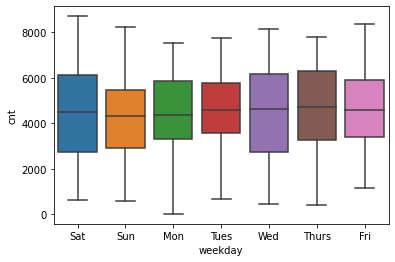

In [35]:
# Checking weekday Vs cnt
sns.boxplot(x='weekday',y='cnt',data=rentalbike)
plt.show()

- we can observe that data almost overlaps for all categories and medians are also at almost same value of cnt.

In [36]:
#checking values for weathersit
rentalbike.weathersit.value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [37]:
# Assigning category to Weathersit :  1: Clear , 2: Mist , 3: Light Snow , 4: Heavy Rain
def asgn_weathersit(x):
    return x.map({1:"Clear", 2: "Mist", 3:"Light Snow", 4:"Heavy Rain"})

rentalbike[['weathersit']]=rentalbike[['weathersit']].apply(asgn_weathersit)   

In [38]:
rentalbike.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2018,spring,0,Jan,0,Sat,0,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,spring,0,Jan,0,Sun,0,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,spring,0,Jan,0,Tues,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


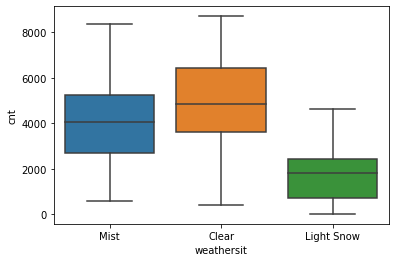

In [39]:
# Checking weathersit Vs cnt
sns.boxplot(x='weathersit',y='cnt',data=rentalbike)
plt.show()

- During Light Snow cnt is low comapred to Clear weather and Mist weather

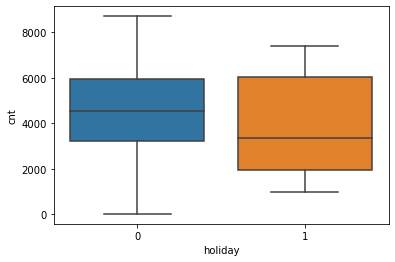

In [40]:
# Checking holiday Vs cnt
sns.boxplot(x='holiday',y='cnt',data=rentalbike)
plt.show()

- median of 'No holiday' is higher than median of 'holiday'  so deamand of rental bikes is more 'No holidays'.

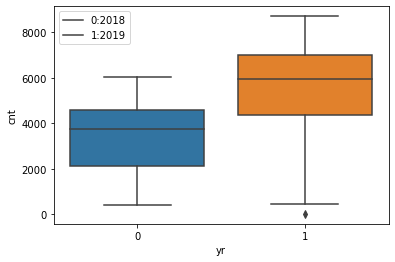

In [41]:
# Checking yr Vs cnt
sns.boxplot(x='yr',y='cnt',data=rentalbike)
plt.legend(['0:2018','1:2019'])
plt.show()

- year 2019 has more demand of rental bikes then year 2018

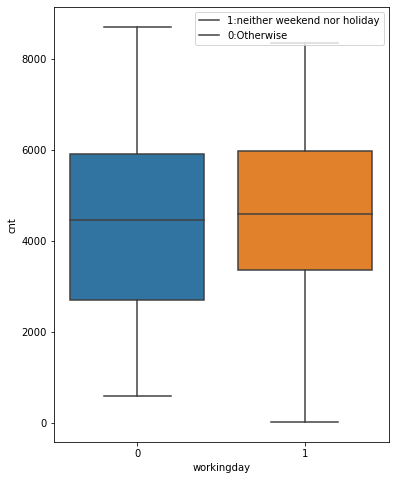

In [42]:
# Checking workingday Vs cnt
plt.figure(figsize=(6,8))
sns.boxplot(x='workingday',y='cnt',data=rentalbike)
plt.legend(['1:neither weekend nor holiday','0:Otherwise'],loc="upper right")
plt.show()

- medians of both are alomost at same values which indicates that working day or not has no infulence on rental bikes  

In [43]:
rentalbike.dtypes

dteday         object
season         object
yr              int64
mnth           object
holiday         int64
weekday        object
workingday      int64
weathersit     object
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [44]:
# Numeric columns 
numcols=['temp','atemp','hum','windspeed','casual','registered','cnt']
numcols

['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

In [45]:
# Checking correlation of numeric columns
rentalbike[numcols].corr()

,temp,atemp,hum,windspeed,casual,registered,cnt
temp,1.000000,0.991696,0.128565,-0.158186,0.542731,0.539436,0.627044
atemp,0.991696,1.000000,0.141512,-0.183876,0.543362,0.543678,0.630685
hum,0.128565,0.141512,1.000000,-0.248506,-0.075211,-0.089212,-0.098543
windspeed,-0.158186,-0.183876,-0.248506,1.000000,-0.167995,-0.217914,-0.235132
casual,0.542731,0.543362,-0.075211,-0.167995,1.000000,0.394137,0.672123
registered,0.539436,0.543678,-0.089212,-0.217914,0.394137,1.000000,0.945411
cnt,0.627044,0.630685,-0.098543,-0.235132,0.672123,0.945411,1.000000


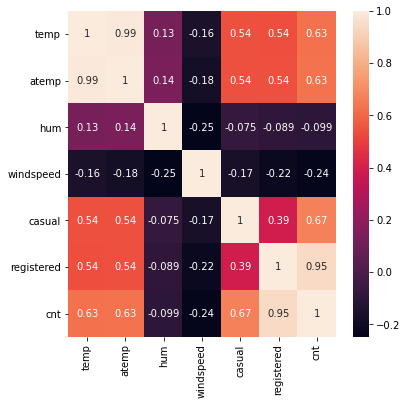

In [46]:
# To check correlation plotting the heat map
plt.figure(figsize=(6,6))
sns.heatmap(rentalbike[numcols].corr(),annot=True)
plt.show()

- From the heatmap we can observe that:
  - varible cnt has correlation with varibles registerd,casual (Also we know, cnt = registered + casual)
  - variable cnt has positive correlation with temp and atemp 
  - varible cnt has negative correlation with variables hum and windspeed (as value of these varibles increases value of cnt variable decreases)
  
  
  - We can also obsereve that variable temp and variable atemp are highly correlated.(temp is temperature in Celsius and atemp is feeling temperature in Celsius)
  - Also Variables temp and atemp has also good correlation with varibles casual and and registered

#### From visualizing the data we can conclude that we can fit linear model on this dataset.

### Step 3 : Data preparation

#### Converting Data to suitable formats for regression

In [47]:
# Changing format of dteday
rentalbike['dteday'] = rentalbike['dteday'].astype('datetime64')

In [48]:
# Changing Numerical Variables for int to float
IntVarList = ['casual','registered','cnt']

for var in IntVarList:
    rentalbike[var] = rentalbike[var].astype('float')

  - cnt: count of total rental bikes including both casual and registered so dropping these two columns.

In [49]:
# Dropping casual and registered
rentalbike.drop(['casual','registered'],axis=1,inplace=True)

In [50]:
# Dropping atemp
rentalbike.drop(['atemp'],axis=1,inplace=True)

In [51]:
# Dropping dteday as yr , month nad day has already been stored in season,weekday,holiday,mnth,yr  
rentalbike.drop(['dteday'],axis=1,inplace=True)

In [52]:
rentalbike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,Jan,0,Sat,0,Mist,14.110847,80.5833,10.749882,985.0
1,spring,0,Jan,0,Sun,0,Mist,14.902598,69.6087,16.652113,801.0
2,spring,0,Jan,0,Mon,1,Clear,8.050924,43.7273,16.636703,1349.0
3,spring,0,Jan,0,Tues,1,Clear,8.200000,59.0435,10.739832,1562.0
4,spring,0,Jan,0,Wed,1,Clear,9.305237,43.6957,12.522300,1600.0


### Encoding dummy variables for categorical columns

In [53]:
# columns for dummy variables
dummycols=['season','mnth','weekday','weathersit']

In [54]:
rentalbike[dummycols]

,season,mnth,weekday,weathersit
0,spring,Jan,Sat,Mist
1,spring,Jan,Sun,Mist
2,spring,Jan,Mon,Clear
3,spring,Jan,Tues,Clear
4,spring,Jan,Wed,Clear
...,...,...,...,...
725,spring,Dec,Thurs,Mist
726,spring,Dec,Fri,Mist
727,spring,Dec,Sat,Mist
728,spring,Dec,Sun,Clear


In [55]:
# Dummy for season, mnth,weekday and weathersit
df_dummy = pd.get_dummies(rentalbike[dummycols],drop_first=True)

In [56]:
#checking shape of dummy dataframe
df_dummy.shape

(730, 22)

In [57]:
# 26 new variables 
df_dummy.head()

,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_Light Snow,weathersit_Mist
0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [58]:
# Dropping varibles for which dummies has been created  
rentalbike.drop(dummycols, axis=1,inplace=True)

In [59]:
# concating rentalbike dataframe with dummy dataframe
rentalbike=pd.concat([rentalbike,df_dummy],axis=1)

In [60]:
rentalbike.shape

(730, 29)

In [61]:
rentalbike.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_Light Snow,weathersit_Mist
0,0,0,0,14.110847,80.5833,10.749882,985.0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,69.6087,16.652113,801.0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349.0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562.0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600.0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


### Step 4 : Splitting the data into training and testing sets

In [62]:
# Splitting Data into train and test dataset

df_train, df_test = train_test_split(rentalbike, train_size = 0.7, test_size = 0.3, random_state = 0)

   ### Step 5 : Rescaling the features

In [63]:
#using MinMax Scaler.
scaler=MinMaxScaler()

In [64]:
rentalbike.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt',
       'season_spring', 'season_summer', 'season_winter', 'mnth_Aug',
       'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun', 'mnth_Mar',
       'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sep', 'weekday_Mon',
       'weekday_Sat', 'weekday_Sun', 'weekday_Thurs', 'weekday_Tues',
       'weekday_Wed', 'weathersit_Light Snow', 'weathersit_Mist'],
      dtype='object')

In [65]:
# Apply scaler() to all the columns except the categorical and 'dummy' variables
numvars=['temp','hum', 'windspeed']

In [66]:
# scaling numeric varibles with Min-Max Scaling.

# Fit_transform on train dataset
df_train[numvars]=scaler.fit_transform(df_train[numvars])

# Transform on test dataset
df_test[numvars]=scaler.transform(df_test[numvars])

In [67]:
df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_Light Snow,weathersit_Mist
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.500000,0.029412,0.690196,0.515088,0.514523,0.373755,4489.303922,0.245098,0.258824,0.239216,...,0.086275,0.076471,0.145098,0.145098,0.135294,0.141176,0.143137,0.154902,0.023529,0.335294
std,0.500491,0.169124,0.462867,0.243011,0.194619,0.192867,1886.652185,0.430568,0.438419,0.427024,...,0.281045,0.266010,0.352545,0.352545,0.342373,0.348545,0.350557,0.362166,0.151726,0.472557
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.301603,0.361513,0.232054,3196.500000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.000000,1.000000,0.503362,0.513631,0.353541,4558.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.734800,0.651342,0.483991,5847.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8714.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [68]:
df_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_Light Snow,weathersit_Mist
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.497717,0.027397,0.666667,0.537535,0.533186,0.365412,4546.127854,0.251142,0.237443,0.251142,...,0.082192,0.095890,0.141553,0.141553,0.164384,0.146119,0.141553,0.109589,0.041096,0.342466
std,0.501140,0.163612,0.472484,0.230350,0.206381,0.198115,2052.877578,0.434663,0.426491,0.434663,...,0.275286,0.295115,0.349389,0.349389,0.371472,0.354034,0.349389,0.313092,0.198967,0.475622
min,0.000000,0.000000,0.000000,-0.048868,-0.353829,-0.049874,605.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.359598,0.386311,0.226618,3106.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.564352,0.529582,0.327053,4539.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.722275,0.678414,0.463343,6308.000000,0.500000,0.000000,0.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.982573,0.986079,1.165056,8555.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Step 6 : Building a linear Model

#### Model 1 : Using all Independent varibles

In [69]:
# Dividing into X and Y sets for the model building
y_train=df_train.pop('cnt')
X_train=df_train
y_test=df_test.pop('cnt')
X_test=df_test

In [70]:
y_train.head()

235    5130.0
524    7498.0
12     1406.0
161    4966.0
556    7264.0
Name: cnt, dtype: float64

In [71]:
X_train.head()

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_Aug,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_Light Snow,weathersit_Mist
235,0,0,1,0.753859,0.488399,0.527988,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
524,1,0,0,0.802869,0.254640,0.255430,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
12,0,0,1,0.089497,0.301044,0.647940,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
161,0,0,0,0.821384,0.557424,0.281887,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
556,1,0,1,0.810494,0.527842,0.274080,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [72]:
y_test.head()

196    5923.0
187    4592.0
14     1248.0
31     1360.0
390    4075.0
Name: cnt, dtype: float64

In [73]:
X_test.head()

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_Aug,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_Light Snow,weathersit_Mist
196,0,0,0,0.771285,0.460557,0.415865,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
187,0,0,1,0.854058,0.552784,0.292782,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
14,0,0,0,0.178804,0.340487,0.289684,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
31,0,0,1,0.125012,0.801018,0.027323,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
390,1,0,1,0.320391,0.717517,0.077873,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1


In [74]:
# Importing required library
from sklearn.linear_model import LinearRegression

# Instantiate object of LinearRegression()
regressor = LinearRegression()

# Fitting the model
regressor.fit(X_train,y_train)

LinearRegression()

In [75]:
# checking the coeficients of the fitted model 
coeff_df = pd.DataFrame(regressor.coef_, X_train.columns, columns=['Coefficient'])
coeff_df

,Coefficient
yr,1932.141767
holiday,-288.414752
workingday,214.435024
temp,3759.921091
hum,-1258.134816
windspeed,-1181.381476
season_spring,-856.840759
season_summer,-66.089979
season_winter,496.199105
mnth_Aug,-260.439606


In [76]:
# model intercept
print(regressor.intercept_)

3049.805976512057


In [77]:
# Predictions of train dataset
y_pred_train = regressor.predict(X_train)

In [78]:
# Predictions of test dataset
y_pred_test = regressor.predict(X_test)

In [79]:
# Evaluating the model 1

# Importing required libraries
from sklearn import metrics

# Finding MAE,MSE and RMSE of train dataset for model 1
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, y_pred_train))
print('Mean Squared Error:', metrics.mean_squared_error(y_train, y_pred_train))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))

Mean Absolute Error: 562.7547961552442
Mean Squared Error: 590618.4262128393
Root Mean Squared Error: 768.5170305288226


In [80]:
# Finding MAE,MSE and RMSE of test dataset for model 1
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_test))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_test))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))

Mean Absolute Error: 565.2807298890272
Mean Squared Error: 556980.2002092509
Root Mean Squared Error: 746.3110612936478


In [81]:
# R-squared and Adj_R-squared of model 1 for train dataset

yhat = regressor.predict(X_train)
SS_Residual = sum((y_train-yhat)**2)
SS_Total = sum((y_train-np.mean(y_train))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
print(r_squared, adjusted_r_squared)

0.833744623040023 0.824066555358361


In [82]:
# R-squared and Adj_R-squared of model 1 for test dataset

yhat = regressor.predict(X_test)
SS_Residual = sum((y_test-yhat)**2)
SS_Total = sum((y_test-np.mean(y_test))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print(r_squared, adjusted_r_squared)

0.8672295963526853 0.84766343160466


### Using RFE for feature selection:

In [83]:
# Using Recursive feature elimination to select features
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE

In [84]:
# Running RFE with the output number of the variable equal to 20
lm1 = LinearRegression()
lm1.fit(X_train, y_train)

rfe1 = RFE(lm1, 20)             # running RFE
rfe1 = rfe1.fit(X_train, y_train)

In [85]:
# List of column names with rfe support and ranking 
list(zip(X_train.columns,rfe1.support_,rfe1.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 5),
 ('season_winter', True, 1),
 ('mnth_Aug', True, 1),
 ('mnth_Dec', True, 1),
 ('mnth_Feb', True, 1),
 ('mnth_Jan', True, 1),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', True, 1),
 ('mnth_Mar', False, 7),
 ('mnth_May', True, 1),
 ('mnth_Nov', True, 1),
 ('mnth_Oct', False, 6),
 ('mnth_Sep', True, 1),
 ('weekday_Mon', False, 2),
 ('weekday_Sat', True, 1),
 ('weekday_Sun', False, 4),
 ('weekday_Thurs', False, 9),
 ('weekday_Tues', False, 3),
 ('weekday_Wed', False, 8),
 ('weathersit_Light Snow', True, 1),
 ('weathersit_Mist', True, 1)]

In [86]:
# list of 20 features selected by rfe 
col1 = X_train.columns[rfe1.support_]
col1

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_winter', 'mnth_Aug', 'mnth_Dec', 'mnth_Feb',
       'mnth_Jan', 'mnth_Jul', 'mnth_Jun', 'mnth_May', 'mnth_Nov', 'mnth_Sep',
       'weekday_Sat', 'weathersit_Light Snow', 'weathersit_Mist'],
      dtype='object')

#### Building model using statsmodel from the selected features by RFE , for the detailed statistics

#### Using Mixed approch for feature slection so selected 20 features using RFE and observing p-values and Vif of the features to eliminate or include them.    

In [87]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe1 = X_train[col1]

In [88]:
# Adding a constant variable 
X_train_rfe1 = sm.add_constant(X_train_rfe1)

In [89]:
X_train_rfe1.head()

,const,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_winter,mnth_Aug,...,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_May,mnth_Nov,mnth_Sep,weekday_Sat,weathersit_Light Snow,weathersit_Mist
235,1.0,0,0,1,0.753859,0.488399,0.527988,0,0,1,...,0,0,0,0,0,0,0,0,0,0
524,1.0,1,0,0,0.802869,0.254640,0.255430,0,0,0,...,0,0,0,1,0,0,0,1,0,0
12,1.0,0,0,1,0.089497,0.301044,0.647940,1,0,0,...,0,1,0,0,0,0,0,0,0,0
161,1.0,0,0,0,0.821384,0.557424,0.281887,0,0,0,...,0,0,0,1,0,0,0,1,0,0
556,1.0,1,0,1,0.810494,0.527842,0.274080,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [90]:
# Running the linear model
lm_rfe1 = sm.OLS(y_train,X_train_rfe1).fit()   

In [91]:
# Summary of linear model
print(lm_rfe1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     121.5
Date:                Fri, 26 Nov 2021   Prob (F-statistic):          3.73e-175
Time:                        14:56:53   Log-Likelihood:                -4114.2
No. Observations:                 510   AIC:                             8270.
Df Residuals:                     489   BIC:                             8359.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2890.55

- We observe that weekday_Sun is insignificant so dropping it.

In [92]:
X_train_rfe1_1 = X_train_rfe1.drop(["weekday_Sun"], axis = 1)

KeyError: "['weekday_Sun'] not found in axis"

In [ ]:
X_train_rfe1_1.head()

In [ ]:
# Rebuilding the model without `weekday_Sun`

lm_rfe1_1 = sm.OLS(y_train,X_train_rfe1_1).fit()   # Running the linear model

In [ ]:
# Deatil Summary
print(lm_rfe1_1.summary())

- We observe that weekday_Sat is insignificant so dropping it.

In [ ]:
X_train_rfe1_2 = X_train_rfe1_1.drop(["weekday_Sat"], axis = 1)

In [ ]:
#Rebuilding the model without `weekday_Sat`
lm_rfe1_2 = sm.OLS(y_train,X_train_rfe1_2).fit()   # Running the linear model

In [ ]:
# Deatil Summary
print(lm_rfe1_2.summary())

In [ ]:
X_train_rfe1_3 = X_train_rfe1_2.drop(["mnth_Sep"], axis = 1)

In [ ]:
#Rebuilding the model without `mnth_Sep`
lm_rfe1_3 = sm.OLS(y_train,X_train_rfe1_3).fit()   # Running the linear model

In [ ]:
# Deatil Summary
print(lm_rfe1_3.summary())

- dropping mnth_Feb

In [ ]:
X_train_rfe1_4 = X_train_rfe1_3.drop(["mnth_Feb"], axis = 1)

In [ ]:
#Rebuilding the model without `mnth_Feb`
lm_rfe1_4 = sm.OLS(y_train,X_train_rfe1_4).fit()   # Running the linear model

In [ ]:
# Deatil Summary
print(lm_rfe1_4.summary())

- dropping mnth_Jan because it insignificant 

In [ ]:
X_train_rfe1_5 = X_train_rfe1_4.drop(["mnth_Jan"], axis = 1)

In [ ]:
#Rebuilding the model without `mnth_Jan`
lm_rfe1_5 = sm.OLS(y_train,X_train_rfe1_5).fit()   # Running the linear model

In [ ]:
# Deatil Summary
print(lm_rfe1_5.summary())

- dropping mnth_Dec beacuse it is insignificant

In [ ]:
X_train_rfe1_6 = X_train_rfe1_5.drop(["mnth_Dec"], axis = 1)

In [ ]:
#Rebuilding the model without `mnth_Dec`
lm_rfe1_6 = sm.OLS(y_train,X_train_rfe1_6).fit()   # Running the linear model

In [ ]:
# Deatil Summary
print(lm_rfe1_6.summary())

- dropping mnth_nov

In [ ]:
X_train_rfe1_7 = X_train_rfe1_6.drop(["mnth_Nov"], axis = 1)

In [ ]:
#Rebuilding the model without `mnth_Nov`
lm_rfe1_7 = sm.OLS(y_train,X_train_rfe1_7).fit()   # Running the linear model

In [ ]:
# Deatil Summary
print(lm_rfe1_7.summary())

In [ ]:
# Calculate the VIFs for the final model

vif = pd.DataFrame()
X = X_train_rfe1_7
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

- As vifs  of columns are below 5. The selected features are no correlated. 

## Step 7 : Residual Analysis of the train data

In [ ]:
# Predicting from trained model

y_train_pred = lm_rfe1_7.predict(X_train_rfe1_7)

In [ ]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

In [ ]:
# Scatter plot of the error terms and cnt
fig = plt.figure()
plt.ylabel('Error Terms')
sns.scatterplot(y_train,(y_train - y_train_pred))

In [ ]:
# Scatter plot of the error terms and cnt
fig = plt.figure()
plt.ylabel('Error Terms')
sns.scatterplot(y_train_pred,(y_train -y_train_pred))

## Step 8 : Making Predictions

#### Applying the scaling on the test sets

In [ ]:
# Final features of the train dataset
X_train_rfe1_7.columns

In [ ]:
# dropping the constant from the train dataset

X_train_final = X_train_rfe1_7.drop(['const'], axis=1)

In [ ]:
X_train_final.columns

In [ ]:
# Selecting the same features for test dataset from the final train dataset
X_test=X_test[X_train_final.columns]

In [ ]:
X_test.columns

In [ ]:
# Adding a constant variable 
X_test = sm.add_constant(X_test)

In [ ]:
X_test.head()

In [ ]:
# Making predictions for test dataset
y_test_pred = lm_rfe1_7.predict(X_test)

In [ ]:
#Model Evaluation

# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_test_pred', fontsize=16)                          # Y-label

In [ ]:
# Evaluating the Algorithm
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_test_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_test_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

In [ ]:
# R-square of Test Model 

from sklearn.metrics import r2_score
r2=r2_score(y_true=y_test,y_pred=y_test_pred)
print("R-Squared Score on test set:",r2)

In [ ]:
# Finding the Top three Coefficients
df_coef1=pd.DataFrame(abs(round(lm_rfe1_7.params,2)))

In [ ]:
df_coef1.sort_values(by=[0],ascending=False)

#### Top three coefficients  are : temp , yr ,weathersit_Light Snow

In [ ]:
print(lm_rfe1_7.params)

##### We can see that the equation of our best fitted line is:

$ cnt = 2879.12 + 4809.55  \times  temp + 1899.10  \times  yr - 1645.66 \times weathersit_Light Snow - 1295.12 \times hum - 1199.95 \times mnth_Jul - 1180.19 \times windspeed - 994.63 \times season_spring - 795.79 \times holiday - 711.14 \times mnth_Jun - 626.69 \times mnth_Aug- 359.57 \times weather_Mist + 299.23 \times season_winter - 211.41 \times workingday $


#### Conclusion :
    

- temperature affect the demand of rental bikes the most.
- Increase in demand of rental bikes can be seen than previous year.
- Bike demand decreses during Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- Bike demand increases in Winter season while decreases during Spring season
- Bike demand decreases during holidays.

## Deploy model

In [ ]:
import pickle

In [ ]:
#Save model the model as a pickel in a file
# save the model to disk
filename = 'finalMLR_model.sav'
pickle.dump(lm_rfe1_7, open(filename, 'wb'))